### Edgar Moises Hernandez-Gonzalez
#### 12/12/19
#### Clasificacion de coeficientes DWT de MI-EEG con LSTM
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/MI-EEG-DWT-Coef-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/DWT-Coef/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22286)
(288, 22286)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los valores en un rango [-1, 1] porque se utiliza tanh
scaler = MinMaxScaler(feature_range=(-1, 1)).fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 1013))
x_test = x_test.reshape((n_samples_test, 22, 1013))

print(x_train.shape)
print(x_test.shape)

(288, 22, 1013)
(288, 22, 1013)


In [11]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 1013, 22)
(288, 1013, 22)


Iteration: 1
Train on 288 samples, validate on 288 samples
Epoch 1/50
288/288 - 72s - loss: 1.3885 - acc: 0.2431 - val_loss: 1.3863 - val_acc: 0.2465
Epoch 2/50
288/288 - 71s - loss: 1.3853 - acc: 0.2500 - val_loss: 1.3865 - val_acc: 0.2361
Epoch 3/50
288/288 - 70s - loss: 1.3835 - acc: 0.2882 - val_loss: 1.3865 - val_acc: 0.2188
Epoch 4/50
288/288 - 73s - loss: 1.3785 - acc: 0.3090 - val_loss: 1.3895 - val_acc: 0.2431
Epoch 5/50
288/288 - 71s - loss: 1.3726 - acc: 0.3056 - val_loss: 1.3923 - val_acc: 0.2396
Epoch 6/50
288/288 - 73s - loss: 1.3699 - acc: 0.3229 - val_loss: 1.3885 - val_acc: 0.2257
Epoch 7/50
288/288 - 72s - loss: 1.3632 - acc: 0.2917 - val_loss: 1.3941 - val_acc: 0.2222
Epoch 8/50
288/288 - 74s - loss: 1.3514 - acc: 0.3438 - val_loss: 1.4117 - val_acc: 0.2812
Epoch 9/50
288/288 - 71s - loss: 1.3339 - acc: 0.3438 - val_loss: 1.4024 - val_acc: 0.2882
Epoch 10/50
288/288 - 71s - loss: 1.3311 - acc: 0.3542 - val_loss: 1.4127 - val_acc: 0.2951
Epoch 11/50
288/288 - 70s - lo

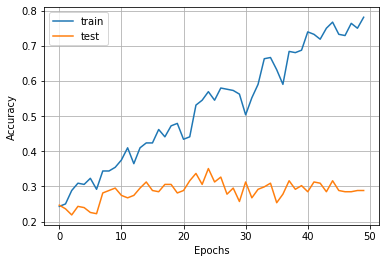

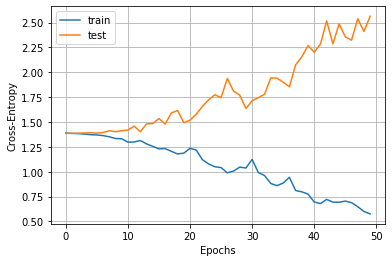

Iteration: 2
Train on 288 samples, validate on 288 samples
Epoch 1/50
288/288 - 73s - loss: 1.3871 - acc: 0.2292 - val_loss: 1.3864 - val_acc: 0.2465
Epoch 2/50
288/288 - 71s - loss: 1.3849 - acc: 0.2396 - val_loss: 1.3865 - val_acc: 0.2257
Epoch 3/50
288/288 - 72s - loss: 1.3827 - acc: 0.2951 - val_loss: 1.3877 - val_acc: 0.2569
Epoch 4/50
288/288 - 72s - loss: 1.3803 - acc: 0.3056 - val_loss: 1.3887 - val_acc: 0.2569
Epoch 5/50
288/288 - 73s - loss: 1.3753 - acc: 0.2951 - val_loss: 1.3965 - val_acc: 0.2361
Epoch 6/50
288/288 - 73s - loss: 1.3731 - acc: 0.3229 - val_loss: 1.3925 - val_acc: 0.2361
Epoch 7/50
288/288 - 75s - loss: 1.3688 - acc: 0.3229 - val_loss: 1.3919 - val_acc: 0.2500
Epoch 8/50
288/288 - 72s - loss: 1.3653 - acc: 0.3056 - val_loss: 1.3945 - val_acc: 0.2639
Epoch 9/50


KeyboardInterrupt: ignored

In [15]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(2): #CAMBIAR A 10
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(1013,22)))
    model.add(LSTM(64, return_sequences=True))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #CAMBIAR VERBOSE = 0
    history = model.fit(x_train, y_train, epochs=50, batch_size=18, validation_data=(x_test, y_test), verbose=2)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [0]:
model.summary()

In [16]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.2882
std: (+/- 0.0000)
kappa: 0.0509
precision: 0.2877
recall: 0.2882
f1: 0.2864
